If possible, update your sklearn version to 1.3.2 to reduce variance in the versions.

In [2]:
#!pip3 install scikit-learn==1.3.2

In [3]:
import sklearn
import numpy as np
print('The scikit-learn version is {}.'.format(sklearn.__version__))

The scikit-learn version is 1.0.2.


## SVM

In [4]:
# Standard scientific Python imports
import matplotlib.pyplot as plt

from sklearn import datasets
from sklearn.model_selection import train_test_split

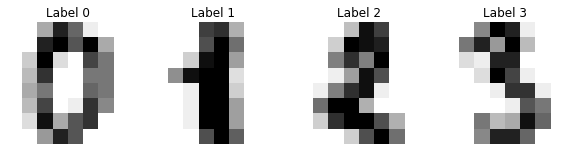

In [5]:
digits = datasets.load_digits()

_, axes = plt.subplots(nrows=1, ncols=4, figsize=(10, 3))
for ax, image, label in zip(axes, digits.images, digits.target):
    ax.set_axis_off()
    ax.imshow(image, cmap=plt.cm.gray_r, interpolation="nearest")
    ax.set_title("Label %i" % label)

In [12]:
# flatten the images
n = len(digits.images)
D = digits.images.reshape((n, -1))
y = digits.target

# Split data into 70% train and 30% test subsets
D_train, D_test, y_train, y_test = train_test_split(
    D, y, test_size=0.3, shuffle=False
)

[0 1 2 ... 8 9 8]


In [8]:
D_test

array([[ 0.,  0.,  0., ...,  0.,  0.,  0.],
       [ 0.,  0.,  5., ...,  3.,  0.,  0.],
       [ 0.,  7., 16., ...,  0.,  0.,  0.],
       ...,
       [ 0.,  0.,  1., ...,  6.,  0.,  0.],
       [ 0.,  0.,  2., ..., 12.,  0.,  0.],
       [ 0.,  0., 10., ..., 12.,  1.,  0.]])

### Exercise a 

Train an RBF kernel SVM with parameters gamma=0.0005, C=0.9. Use the SVC SVM model from sklearn to do so. Train the model on the D_train dataset (70-30 split) and test the model on the D_test dataset. What is the accuracy of the model on the test data?

In [38]:
from sklearn.svm import SVC

gamma = 0.0005
C= 0.9

# SVM model with RBF kernel
svm_model = SVC(kernel='rbf', gamma=gamma, C=C, decision_function_shape='ovo')

# Train model on training data
svm_model.fit(D_train, y_train)

# Predict labels for test data
y_pred = svm_model.predict(D_test)

# Evaluate accuracy of model
accuracy = svm_model.score(D_test, y_test)

accuracy

0.9555555555555556

## Excercise C

In [52]:
# Get the amount of support vectors per class
n_support_vectors_per_class = svm_model.n_support_
print(n_support_vectors_per_class)

# Get the class labels
class_labels = svm_model.classes_


# Print the mapping between class indices and class labels
num_support_vectors_0_1 = n_support_vectors_per_class[0] + n_support_vectors_per_class[1]
print(num_support_vectors_0_1)

[38 71 55 64 52 57 41 61 81 81]
109


## Excercise D

In [50]:
support_vectors = svm_model.support_vectors_
#print(support_vectors[1])
#print(len(support_vectors[1]))
print(svm_model.support_vectors_)
print(svm_model.support_)
class_index = 1
support_vectors_class_1 = svm_model.support_vectors_
#support_vectors_class_1[svm_model.decision_function(D_train)[:, ]]

[[ 0.  0.  1. ...  3.  0.  0.]
 [ 0.  0.  2. ...  4.  0.  0.]
 [ 0.  0. 10. ... 12.  4.  0.]
 ...
 [ 0.  0. 13. ... 12.  0.  0.]
 [ 0.  0.  9. ...  6.  0.  0.]
 [ 0.  1.  7. ...  5.  0.  0.]]
[  10   55   78  101  150  179  208  209  286  292  304  465  487  564
  588  594  595  617  656  695  701  776  796  824  825  831  854  902
  980  981 1025 1049 1077 1078 1187 1205 1229 1235   70   90   93   99
  131  151  177  186  200  215  218  235  257  267  277  303  312  336
  341  355  363  387  397  433  442  471  485  493  527  537  563  586
  596  606  615  623  667  688  693  726  731  736  745  753  777  787
  818  823  832  846  856  861  883  906  916  926  947  952  958 1000
 1030 1083 1117 1126 1158 1178 1204 1213 1227 1242 1256    2   12   50
   51   54   57   75   77  115  142  184  187  205  241  243  244  369
  398  436  440  443  461  470  502  518  528  538  566  567  573  593
  600  632  648  658  668  697  700  703  721  723  730  759  827  851
  853  889  891  892  917 1

### Exercise e
Use the sklearn function GridSearchCV to determine the best combination for the parameters gamma and C according to a 5-fold cross validation of the SVC SVM with RBG kernel. Train the model on the whole dataset D, not just D_train. Use as the scoring method the accuracy and set as the candidate parameters $gamma \in \{0.0001,0.0005,0.001,0.005\}$ and $C \in \{0.6,0.8,1,2,4\}$.

The code below is implemented according to the documentation for GridSearchCV, source: https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.GridSearchCV.html#sklearn.model_selection.GridSearchCV


In [8]:
from sklearn.model_selection import GridSearchCV

# Define param grid
param_grid = {'gamma': [0.0001, 0.0005, 0.001, 0.005], 'C': [0.6, 0.8, 1, 2, 4]}

# SVM model with RBF kernel
svm_model = SVC(kernel='rbf')

# Use GridSearchCV
grid_search = GridSearchCV(estimator=svm_model, param_grid=param_grid, scoring='accuracy', cv=5)

# Fit the model to D
grid_search.fit(D, y)

# Get best parameters and accuracy
best_params = grid_search.best_params_
best_accuracy = grid_search.best_score_

print(best_params, best_accuracy)


{'C': 4, 'gamma': 0.0005} 0.9744073042401734
